# **Parameter Optimization for Multiclass Dataset**
### Done By Abhimanyu Mehta
### Roll No. 102103045
### Group 3CO2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# metadata
print(dry_bean.metadata)

# variable information
print(dry_bean.variables)


{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

In [6]:
print("First few rows of features (X):")
print(X.head())

First few rows of features (X):
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913

In [7]:
print("\nFirst few rows of targets (y):")
print(y.head())


First few rows of targets (y):
   Class
0  SEKER
1  SEKER
2  SEKER
3  SEKER
4  SEKER


In [8]:
print(y)

          Class
0         SEKER
1         SEKER
2         SEKER
3         SEKER
4         SEKER
...         ...
13606  DERMASON
13607  DERMASON
13608  DERMASON
13609  DERMASON
13610  DERMASON

[13611 rows x 1 columns]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.3, random_state=42)

In [10]:
# kernels = ['linear', 'poly', 'sigmoid', 'rbf', 'anovadot']
kernels=['rbf', 'poly', 'linear']
pbounds = {'kernel': (0, len(kernels)-1),
           'nu': (0.01, 0.1),
           'tol': (1e-6, 1.0)}

In [11]:
def evaluate_svm(kernel, nu, tol):
  kernel_name = kernels[int(kernel)]
  model = NuSVC(kernel=kernel_name, nu=nu, tol=tol)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [12]:
# results = []
# optimizers = []
# for sample in range(1):
#   optimizer = BayesianOptimization(evaluate_svm, pbounds)
#   optimizer.maximize(init_points=5, n_iter=20)
#   best_params = optimizer.max['params']
#   best_accuracy = optimizer.max['target']
#   results.append((sample, best_accuracy, best_params))
#   optimizers.append(optimizer)

results = []
optimizers = []
targets = []  # Store target values (accuracy scores)
iteration_counts = []  # Store iteration counts

for sample in range(10):
    optimizer = BayesianOptimization(evaluate_svm, pbounds)
    optimizer.maximize(init_points=5, n_iter=100)
    best_params = optimizer.max['params']
    best_accuracy = optimizer.max['target']
    results.append((sample, best_accuracy, best_params))
    optimizers.append(optimizer)

    # Store target values and iteration counts
    targets.append(optimizer._space.target)
    iteration_counts.append(optimizer._space.params.shape[0])

|   iter    |  target   |  kernel   |    nu     |    tol    |
-------------------------------------------------------------
| 1         | 0.4033    | 0.2032    | 0.03614   | 0.9528    |
| 2         | 0.5081    | 0.8169    | 0.09366   | 0.7195    |
| 3         | 0.6033    | 1.498     | 0.09493   | 0.01967   |
| 4         | 0.5619    | 1.214     | 0.05768   | 0.1473    |
| 5         | 0.5509    | 0.4577    | 0.01204   | 0.8728    |
| 6         | 0.391     | 0.8176    | 0.05984   | 0.0795    |
| 7         | 0.4261    | 0.6973    | 0.06011   | 0.1366    |
| 8         | 0.4219    | 1.763     | 0.02057   | 0.4361    |
| 9         | 0.6151    | 1.434     | 0.05147   | 0.5277    |
| 10        | 0.4148    | 1.375     | 0.07045   | 0.3539    |
| 11        | 0.5916    | 1.45      | 0.04488   | 0.5945    |
| 12        | 0.596     | 1.424     | 0.01358   | 0.5793    |
| 13        | 0.6557    | 1.353     | 0.0733    | 0.01423   |
| 14        | 0.4917    | 1.236     | 0.0131    | 0.001494  |
| 15    

In [13]:
table = pd.DataFrame(results, columns=['Sample', 'Best Accuracy', 'Best SVM Parameter'])
print(table)

   Sample  Best Accuracy                                 Best SVM Parameter
0       0       0.754407  {'kernel': 1.408982922855638, 'nu': 0.08974105...
1       1       0.674829  {'kernel': 1.3970590566763783, 'nu': 0.0891928...
2       2       0.680705  {'kernel': 1.8087036910089025, 'nu': 0.0480236...
3       3       0.655730  {'kernel': 1.4608760348442171, 'nu': 0.0227568...
4       4       0.703967  {'kernel': 1.0158996690679756, 'nu': 0.0825985...
5       5       0.676787  {'kernel': 1.1672534282203173, 'nu': 0.0826436...
6       6       0.726249  {'kernel': 1.5162059090760185, 'nu': 0.0247099...
7       7       0.743389  {'kernel': 1.0628528666517394, 'nu': 0.0531568...
8       8       0.752449  {'kernel': 1.7971295882282277, 'nu': 0.0676911...
9       9       0.688541  {'kernel': 1.9151595246469606, 'nu': 0.0320048...


In [14]:
max_accuracy_sample = table.loc[table['Best Accuracy'].idxmax()]
print(f"Sample with maximum accuracy: {max_accuracy_sample['Sample']}")

Sample with maximum accuracy: 0


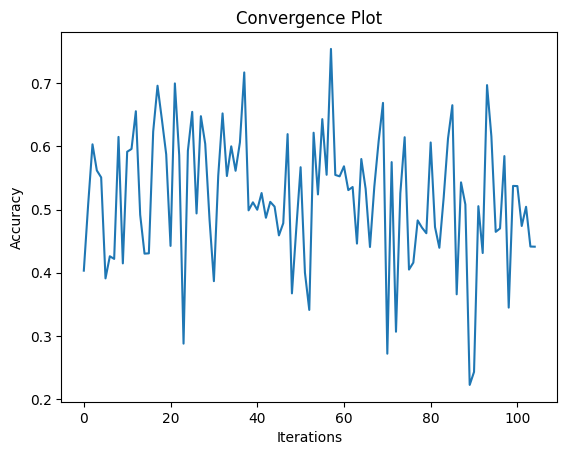

In [15]:
max_accuracy_optimizer_idx = max_accuracy_sample['Sample']
iterations = range(iteration_counts[max_accuracy_optimizer_idx])
plt.plot(iterations, targets[max_accuracy_optimizer_idx][:iteration_counts[max_accuracy_optimizer_idx]])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Plot')
plt.show()